In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
from tqdm import tqdm
import os

import utils_gen
from scenegraph_to_mpl_helpers import *

In [2]:
path_scenegraph = "./scenegraphs"
files_sg = list(filter(lambda k: 'json' in k, os.listdir(path_scenegraph)))
files_sg.sort()

assert(len(files_sg) == 8822) ## unit test check length

scene_id_to_mpl_code = {}

n_success = 0
n_error = 0
for file in tqdm(files_sg): #["1.json"]
    scene_id = file.split(".")[0]
    filepath = os.path.join(path_scenegraph, file)
    with open(filepath) as f:
        read_sg = json.load(f)
        try:
            chart_title = utils_gen.parse_title(read_sg)[1]
            x_label = utils_gen.parse_axes(read_sg)[5]
            y_label = utils_gen.parse_axes(read_sg)[11]
            #xy_ticks = utils_gen.parse_ticks(read_sg)
            #xy_scales = modified_parse_scales(read_sg)
            xy_scales = parse_ax_scales(read_sg)
            x_scale_type = xy_scales["x-scale"][0]
            x_tick_min = xy_scales["x-scale"][1]
            x_tick_max = xy_scales["x-scale"][2]
            y_scale_type = xy_scales["y-scale"][0]
            y_tick_min = xy_scales["y-scale"][1]
            y_tick_max = xy_scales["y-scale"][2]
            chart_data_parsed = utils_gen.parse_marks_dt(read_sg, x_label, y_label)
            chart_data_parsed = np.array([[pt[0], pt[1]] for pt in chart_data_parsed], dtype=object)
            chart_type = utils_gen.parse_marks(read_sg)[1]
            #print(x_scale_type)
            #print(y_scale_type)
            #print(chart_data_parsed)
            scene_id_to_mpl_code[scene_id] = generate_mpl_plot_code(chart_type,
                                                chart_data_parsed, chart_title,
                                                x_label, y_label,
                                                x_scale_type, y_scale_type,
                                                x_tick_min, x_tick_max,
                                                y_tick_min, y_tick_max)
            #print(chart_data_parsed)
            #print(scene_id_to_mpl_code[scene_id])
            n_success += 1
        except Exception as e:
            raise e
            n_error += 1
            print(e)
np.save("vistext_id_to_mpl_code", scene_id_to_mpl_code)
print(f"Successes: {n_success}")
print(f"Errors: {n_error}")

  0%|          | 0/8822 [00:00<?, ?it/s]

100%|██████████| 8822/8822 [00:14<00:00, 606.40it/s]

Successes: 8822
Errors: 0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
mpl_codes = np.load("./vistext_id_to_mpl_code.npy", allow_pickle=True).item()
#for i in range(1, 100):
#    print(mpl_codes[str(i)])
#    exec(mpl_codes[str(i)])
#    plt.show()
print(mpl_codes[str(878)])

chart_data = np.array([[1985, 56907], [1986, 58990], [1987, 60937], [1988, 62558], [1989, 64149], [1990, 64966], [1991, 65572], [1992, 66148], [1993, 66773], [1994, 67681], [1995, 68538], [1996, 69470], [1997, 70534], [1998, 71798], [1999, 73157], [2000, 74390], [2001, 75534], [2002, 76962], [2003, 78872], [2004, 81324], [2005, 83935], [2006, 86214], [2007, 87842], [2008, 88549], [2009, 88757]], dtype=float)
plt.title("Number of shopping malls in the United States with less than 100,001 sq . feet of gross leasable area from 1986 to 2010")
plt.xlabel("Year")
plt.ylabel("Number of shopping malls")
plt.xticks(rotation=45)
plt.plot(chart_data[:, 0], chart_data[:, 1])
plt.fill_between(list(chart_data[:, 0]), list(chart_data[:, 1]))
plt.ylim(bottom=0.0)



(0.0, 93194.85)

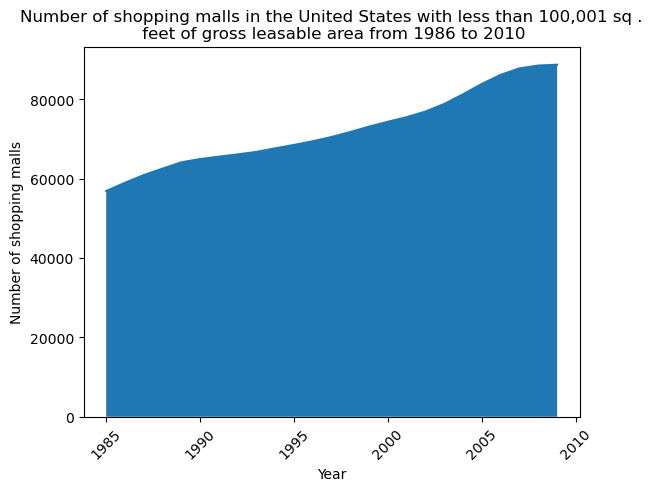

In [5]:
chart_data = np.array([[1985, 56907], [1986, 58990], [1987, 60937], [1988, 62558], [1989, 64149], [1990, 64966], [1991, 65572], [1992, 66148], [1993, 66773], [1994, 67681], [1995, 68538], [1996, 69470], [1997, 70534], [1998, 71798], [1999, 73157], [2000, 74390], [2001, 75534], [2002, 76962], [2003, 78872], [2004, 81324], [2005, 83935], [2006, 86214], [2007, 87842], [2008, 88549], [2009, 88757]], dtype=float)
plt.title("Number of shopping malls in the United States with less than 100,001 sq .\n feet of gross leasable area from 1986 to 2010")
plt.xlabel("Year")
plt.ylabel("Number of shopping malls")
plt.xticks(rotation=45)
plt.plot(chart_data[:, 0], chart_data[:, 1])
plt.fill_between(list(chart_data[:, 0]), list(chart_data[:, 1]))
plt.ylim(bottom=0.0)